/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


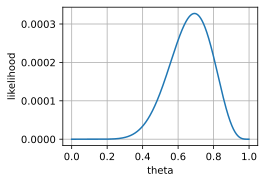

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

theta = torch.arange(0, 1, 0.001)
p = theta**9 * (1 - theta)**4.

d2l.plot(theta, p, 'theta', 'likelihood')

### Numerical Optimization and the Negative Log-Likelihood

In [2]:
# Set up our data
n_H = 8675309
n_T = 256245

# Initialize our parameters
theta = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 1e-9
for iter in range(100):
    loss = -(n_H * torch.log(theta) + n_T * torch.log(1 - theta))
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
    theta.grad.zero_()

# Check output
theta, n_H / (n_H + n_T)

(tensor(0.9713, requires_grad=True), 0.9713101437890875)

## Distributions

In [2]:
%matplotlib inline
from math import erf, factorial
import torch
from IPython import display
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)) * 2 # Define pi in torch

/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Bernoulli

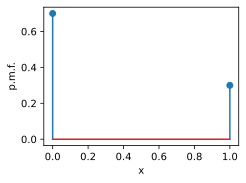

In [7]:
p = 0.3

d2l.set_figsize()
d2l.plt.stem([0, 1], [1 - p, p])
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

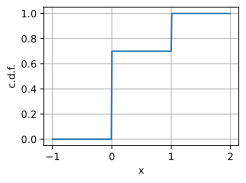

In [8]:
x = torch.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x > 1 else 1 - p

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

We can sample an array of arbitrary shape from a Bernoulli random variable.

In [10]:
1*(torch.rand(10, 10) < p)

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 0]])

### Discrete Uniform

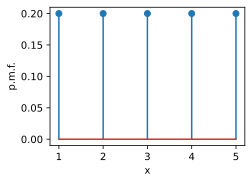

In [11]:
n = 5

d2l.plt.stem([i+1 for i in range(n)], n*[1 / n])
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

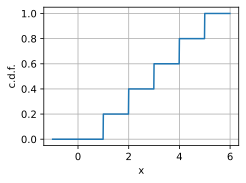

In [13]:
x = torch.arange(-1, 6, 0.01)

def F(x):
    return 0 if x < 1 else 1 if x > n else torch.floor(x) / n

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

We can sample an array of arbitrary shape from a discrete uniform random variable.

In [14]:
torch.randint(1, n, size=(10, 10))

tensor([[1, 4, 2, 1, 3, 2, 4, 2, 3, 3],
        [2, 4, 2, 1, 3, 1, 1, 4, 3, 1],
        [2, 2, 4, 3, 3, 4, 1, 4, 1, 3],
        [2, 3, 1, 2, 2, 3, 1, 1, 1, 4],
        [1, 1, 2, 3, 2, 3, 3, 2, 3, 2],
        [2, 4, 2, 4, 4, 2, 4, 3, 1, 3],
        [2, 3, 4, 4, 4, 2, 2, 3, 4, 2],
        [2, 1, 3, 3, 1, 3, 1, 1, 4, 3],
        [4, 3, 1, 1, 2, 1, 2, 3, 3, 1],
        [2, 3, 1, 2, 3, 3, 2, 4, 1, 4]])

### Continuous Uniform

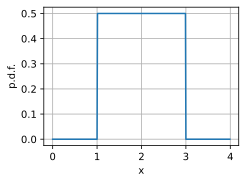

In [15]:
a, b = 1, 3

x = torch.arange(0, 4, 0.01)
p = (x > a).type(torch.float32)*(x < b).type(torch.float32)/(b-a)
d2l.plot(x, p, 'x', 'p.d.f.')

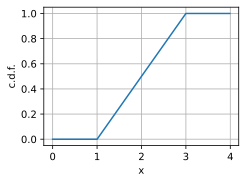

In [18]:
def F(x):
    return 0 if x < a else 1 if x > b else (x - a) / (b - a)

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

We can sample an array of arbitrary shape from a uniform random variable.

In [19]:
(b - a) * torch.rand(10, 10) + a

tensor([[1.5493, 2.0133, 1.9042, 1.5201, 1.6101, 1.1613, 2.1071, 1.9361, 2.0520,
         2.3032],
        [1.8677, 1.5123, 1.5417, 1.9748, 2.4595, 2.2539, 1.4829, 2.5660, 1.2066,
         2.5530],
        [2.2427, 2.9977, 1.9354, 1.1753, 1.7678, 1.7720, 2.8836, 1.1399, 2.7704,
         2.7193],
        [1.0201, 2.9208, 2.3962, 2.1182, 2.9377, 2.0991, 1.5945, 1.3858, 2.2374,
         1.1014],
        [2.7433, 2.8047, 1.2455, 1.6695, 2.5716, 1.1122, 1.4766, 1.1271, 2.0078,
         2.3890],
        [2.0202, 1.9470, 2.6325, 2.3681, 1.1163, 1.5943, 1.8444, 2.9495, 1.1273,
         2.8931],
        [2.3307, 1.4732, 2.5704, 1.8544, 2.3465, 2.1497, 2.8985, 1.8464, 2.6002,
         1.1802],
        [1.9438, 1.3797, 2.1198, 2.0129, 2.1665, 1.7147, 2.0511, 2.2483, 1.4811,
         1.3386],
        [1.5186, 2.0755, 2.3874, 2.5725, 1.0743, 1.9082, 1.0673, 2.0820, 1.7113,
         1.8500],
        [1.0478, 2.5332, 1.4730, 1.1553, 2.9912, 2.2038, 1.7869, 2.5686, 1.4088,
         1.3145]])

### Binomial

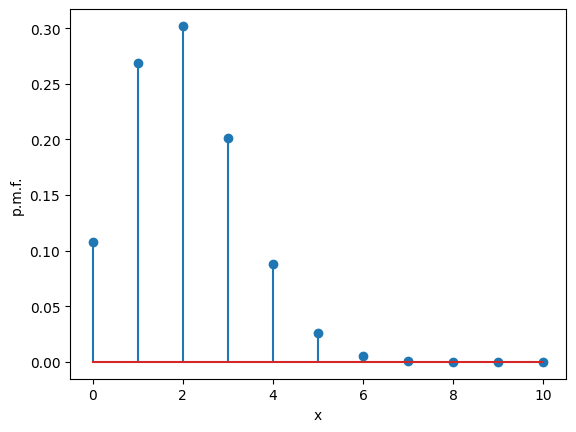

In [3]:
n, p = 10, 0.2

# Compute binomial coefficient
def binom(n, k):
    comb = 1
    for i in range(min(k, n-k)):
        comb = comb * (n - i) // (i + 1)
    return comb

pmf = torch.tensor([p**i * (1-p)**(n - i) * binom(n, i) for i in range(n + 1)])

d2l.plt.stem([i for i in range(n + 1)], pmf)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

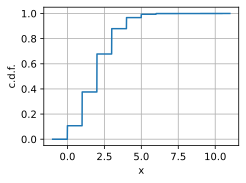

In [4]:
x = torch.arange(-1, 11, 0.01)
cmf = torch.cumsum(pmf, dim=0)

def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, torch.tensor([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [5]:
m = torch.distributions.binomial.Binomial(n, p)
m.sample(sample_shape=(10, 10))

tensor([[3., 1., 1., 1., 1., 0., 0., 3., 4., 1.],
        [1., 0., 1., 2., 2., 1., 1., 3., 2., 1.],
        [1., 2., 1., 4., 3., 4., 2., 1., 3., 2.],
        [2., 2., 1., 1., 1., 4., 3., 1., 4., 0.],
        [4., 3., 0., 4., 5., 2., 2., 2., 2., 0.],
        [1., 3., 2., 3., 1., 1., 4., 3., 3., 0.],
        [1., 1., 2., 2., 0., 2., 0., 0., 0., 4.],
        [4., 3., 2., 3., 2., 2., 3., 3., 2., 0.],
        [2., 1., 0., 2., 2., 3., 3., 2., 1., 2.],
        [3., 0., 2., 3., 5., 0., 0., 2., 2., 1.]])

### Poisson

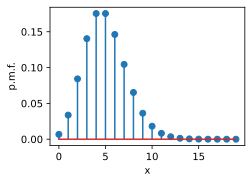

In [7]:
lam = 5.0

xs = [i for i in range(20)]
pmf = torch.tensor([torch.exp(torch.tensor(-lam)) * lam**k
                    / factorial(k) for k in xs])

d2l.plt.stem(xs, pmf)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

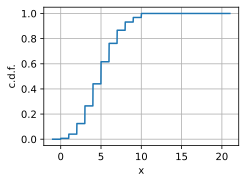

In [8]:
x = torch.arange(-1, 21, 0.01)
cmf = torch.cumsum(pmf, dim=0)
def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, torch.tensor([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [9]:
m = torch.distributions.poisson.Poisson(lam)
m.sample((10, 10))

tensor([[ 6.,  2.,  6.,  3.,  7.,  4.,  5., 10.,  6.,  5.],
        [ 6.,  4.,  7.,  6.,  7.,  3.,  5.,  2.,  2.,  4.],
        [ 6.,  2.,  4.,  3.,  2.,  4.,  5.,  4.,  8.,  6.],
        [ 7.,  6.,  5., 10.,  5.,  5.,  6.,  1.,  6.,  7.],
        [ 6.,  8.,  4.,  7.,  9.,  5.,  6.,  4.,  6.,  3.],
        [ 4.,  5.,  7.,  3.,  8.,  4.,  7.,  9.,  7.,  6.],
        [12.,  9.,  5.,  8.,  5.,  5.,  7.,  4.,  7.,  9.],
        [ 7.,  6.,  9.,  3.,  3.,  8.,  8.,  9.,  5.,  4.],
        [ 4.,  4.,  3.,  8.,  6.,  2.,  3.,  6.,  7.,  4.],
        [ 8.,  7.,  5.,  1., 10.,  6.,  5.,  5.,  2.,  5.]])

### Gaussian

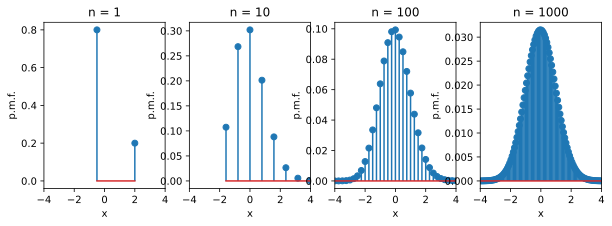

In [10]:
p = 0.2
ns = [1, 10, 100, 1000]
d2l.plt.figure(figsize=(10, 3))

for i in range(4):
    n = ns[i]
    pmf = torch.tensor([p**i * (1-p)**(n-i) * binom(n, i) 
                        for i in range(n + 1)])
    
    d2l.plt.subplot(1, 4, i + 1)
    d2l.plt.stem([(i - n*p)/torch.sqrt(torch.tensor(n*p*(1 - p))) 
                  for i in range(n + 1)], pmf)
    d2l.plt.xlim([-4, 4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')
    d2l.plt.title("n = {}".format(n))
    
d2l.plt.show()

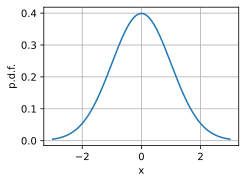

In [11]:
mu, sigma = 0, 1

x = torch.arange(-3, 3, 0.01)
p = 1 / torch.sqrt(2 * torch.pi * sigma**2) * torch.exp(
    -(x - mu)**2 / (2 * sigma**2))

d2l.plot(x, p, 'x', 'p.d.f.')

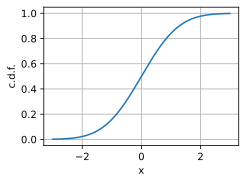

In [13]:
def phi(x):
    return (1.0 + erf((x - mu) / (sigma * torch.sqrt(torch.tensor(2.))))) / 2.0

d2l.plot(x, torch.tensor([phi(y) for y in x.tolist()]), 'x', 'c.d.f.')

We can sample from the **Gaussian (or standard normal)** distribution

In [14]:
torch.normal(mu, sigma, size=(10, 10))

tensor([[ 1.0931, -0.3162,  0.6486,  0.2666,  0.0286, -0.3105,  1.1119, -0.4608,
         -0.1524,  1.2338],
        [-1.5138,  2.1689,  1.4389,  0.4337,  0.1602, -1.5867,  1.0206, -0.6343,
         -0.3088,  1.3905],
        [ 1.0240, -0.6474,  0.0823,  0.3545, -0.4200, -0.6726, -0.2659, -0.4700,
         -0.2152,  0.0634],
        [ 0.3652,  1.3958, -0.5185, -0.5458,  1.1762,  0.6428,  0.5722,  0.5872,
         -2.0826,  0.6987],
        [-1.6261,  0.9359,  1.5133,  0.3714, -0.9613,  1.0780,  0.4339, -0.2798,
         -1.5332, -0.6562],
        [-2.3400, -0.0256,  0.2361, -0.1362, -1.0281, -0.1982, -0.5366,  1.8843,
         -0.8790, -0.9017],
        [ 2.2596, -0.2451,  0.5381, -0.6476, -0.7461, -2.3871, -1.0148, -0.3354,
          1.0436,  0.6258],
        [ 0.0240, -1.1606,  0.4078, -0.0609,  0.3860,  1.8908, -1.3019,  0.0791,
         -0.4775, -0.8317],
        [-0.1868, -0.7029,  0.7256, -1.1980,  1.2610, -0.9831,  0.2658, -1.9119,
          0.6581,  0.0586],
        [-0.8634, -

## Statistics

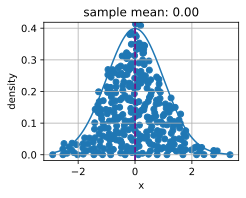

In [2]:
import torch
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)) * 2 #define pi in torch

# Sample datapoints and create y coordinate
epsilon = 0.1
torch.manual_seed(8675309)
xs = torch.randn(size=(300,))

ys = torch.tensor(
    [torch.sum(torch.exp(-(xs[:i] - xs[i])**2 / (2 * epsilon**2)) \
               / torch.sqrt(2*torch.pi*epsilon**2)) / len(xs)\
                for i in range(len(xs))])

# Compute true density
xd = torch.arange(torch.min(xs), torch.max(xs), 0.01)
yd = torch.exp(-xd**2/2) / torch.sqrt(2 * torch.pi)

# Plot the results
d2l.plot(xd, yd, 'x', 'density')
d2l.plt.scatter(xs, ys)
d2l.plt.axvline(x=0)
d2l.plt.axvline(x=torch.mean(xs), linestyle='--', color='purple')
d2l.plt.title(f'sample mean: {float(torch.mean(xs).item()):.2f}')
d2l.plt.show()

In [3]:
# Statistical bias
def stat_bias(true_theta, est_theta):
    return (torch.mean(est_theta) - true_theta)

# Mean Squared error
def mse(data, true_theta):
    return (torch.mean(torch.square(data - true_theta)))

In [4]:
theta_true = 1
sigma = 4
sample_len = 10000
samples = torch.normal(theta_true, sigma, size=(sample_len, 1))
theta_est = torch.mean(samples)
theta_est

tensor(1.0170)

In [5]:
mse(samples, theta_true)

tensor(16.0298)

In [6]:
bias = stat_bias(theta_true, theta_est)
torch.square(samples.std(unbiased=False)) + torch.square(bias)

tensor(16.0298)